# **LABORATORIO 05 - Punto 1.**


Se genera un conjunto de datos sintético con entre 1 y 20 clusters distribuidos aleatoriamente en un rango amplio. Luego, visualiza los puntos sin diferenciar los clusters ni mostrar los centroides, usando un color uniforme.

Numero de centroides : 8


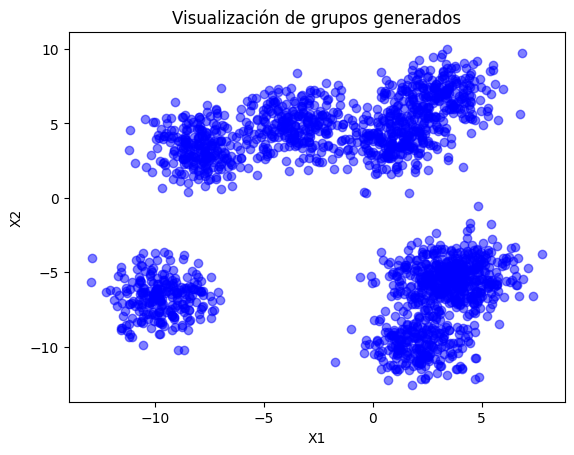

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Definir el número de centroides (entre 1 y 20)
num_centroids = np.random.randint(1, 21)
print("Numero de centroides :",num_centroids)

# Generar coordenadas de los centroides con una separación significativa
blob_centers = np.random.uniform(-10, 10, size=(num_centroids, 2))

# Definir la dispersión uniforme para los grupos
blob_std = np.full(num_centroids, 1.2)

# Generar los datos de los grupos
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

# Visualización con todos los puntos del mismo color y sin los centroides
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualización de grupos generados")
plt.show()

**Método del Codo**

**Evaluación de diferentes valores de k (clusters):**

-Se ejecuta K-Means para valores entre 2 y 20 y se guarda la inercia (suma de las distancias al centro del cluster).

**Método del Codo geométrico**

Se toma la línea recta entre los extremos (k=2 y k=20) en la gráfica de inercia.

Se calcula la distancia perpendicular de cada punto de la curva a esa línea.

El punto con mayor distancia indica el número óptimo de clusters (optimal_k_codo), porque es donde la mejora en la inercia empieza a estabilizarse.

El número óptimo de clusters es: 5


<ipython-input-47-06af78d0d418>:24: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(line_end - line_start, pt - line_start) / np.linalg.norm(line_end - line_start))


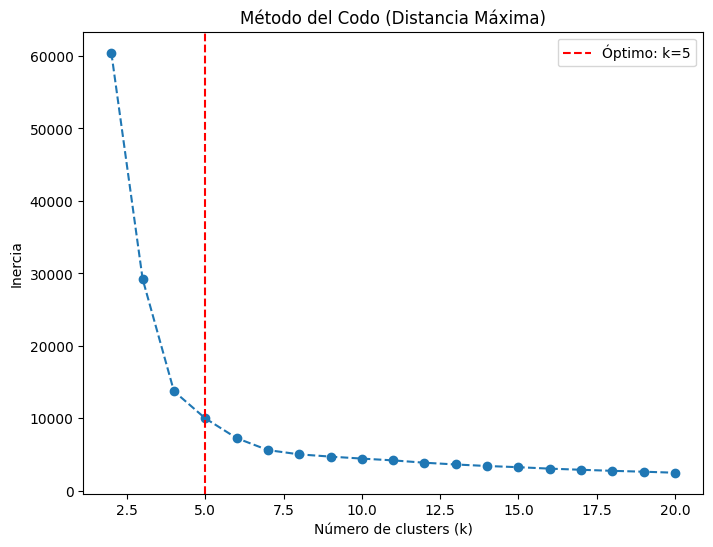

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Evaluar K entre 2 y 20
k_values = list(range(2, 21))
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Método del codo (distancia al segmento recto entre el primer y último punto)
x = np.array(k_values)
y = np.array(inertias)

# Línea recta entre los extremos
point1 = np.array([x[0], y[0]])
point2 = np.array([x[-1], y[-1]])

# Calcula distancia de cada punto a la línea
def perpendicular_distance(pt, line_start, line_end):
    return np.abs(np.cross(line_end - line_start, pt - line_start) / np.linalg.norm(line_end - line_start))

distances = [perpendicular_distance(np.array([x[i], y[i]]), point1, point2) for i in range(len(x))]
optimal_k_codo = x[np.argmax(distances)]

print(f"El número óptimo de clusters es: {optimal_k_codo}")

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.axvline(x=optimal_k_codo, color='red', linestyle='--', label=f'Óptimo: k={optimal_k_codo}')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo (Distancia Máxima)")
plt.legend()
plt.show()





<ipython-input-52-986d99f1dbb6>:25: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(line_end - line_start, pt - line_start) / np.linalg.norm(line_end - line_start))


El número óptimo de clusters es: 5


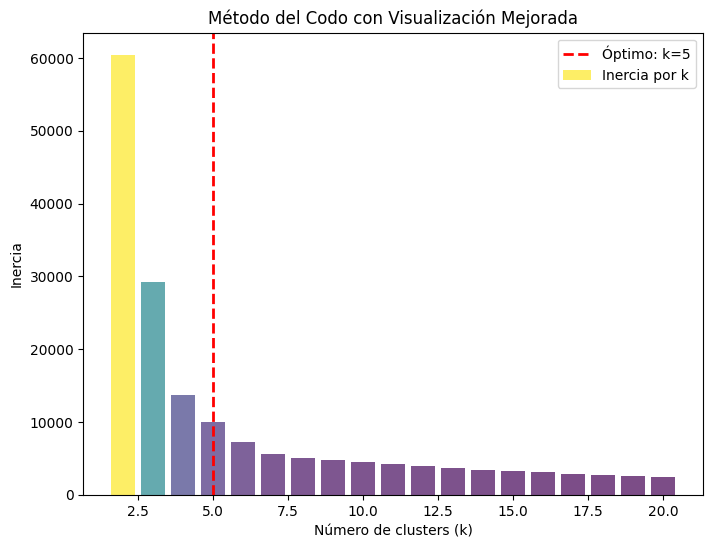

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans

# Evaluar K entre 2 y 20
k_values = list(range(2, 21))
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Método del codo geométrico (distancia al segmento recto entre el primer y último punto)
x = np.array(k_values)
y = np.array(inertias)

# Línea recta entre los extremos
point1 = np.array([x[0], y[0]])
point2 = np.array([x[-1], y[-1]])

# Calcula distancia de cada punto a la línea
def perpendicular_distance(pt, line_start, line_end):
    return np.abs(np.cross(line_end - line_start, pt - line_start) / np.linalg.norm(line_end - line_start))

distances = [perpendicular_distance(np.array([x[i], y[i]]), point1, point2) for i in range(len(x))]
optimal_k_codo = x[np.argmax(distances)]

print(f"El número óptimo de clusters es: {optimal_k_codo}")

# Gráfico mejorado del método del codo
fig, ax = plt.subplots(figsize=(8, 6))

# Colores progresivos para visualizar mejor la reducción de inercia
norm = mpl.colors.Normalize(vmin=min(inertias), vmax=max(inertias))
colors = [mpl.cm.viridis(norm(val)) for val in inertias]

# Barras para mostrar la caída de inercia
ax.bar(k_values, inertias, color=colors, alpha=0.7, label="Inercia por k")

# Línea roja para indicar el óptimo
ax.axvline(x=optimal_k_codo, color='red', linestyle='--', linewidth=2, label=f'Óptimo: k={optimal_k_codo}')

# Ajustes de etiquetas y título
ax.set_xlabel("Número de clusters (k)")
ax.set_ylabel("Inercia")
ax.set_title("Método del Codo con Visualización Mejorada")
ax.legend()

plt.show()


**Metodo Silhouette Score**

ejecuta K-Means para valores de k entre 2 y 10, guardando los modelos en kmeans_per_k.

Calcula el Silhouette Score para cada modelo, una métrica que evalúa qué tan bien se agrupan los puntos:

Un valor más alto indica que los clusters están bien definidos.

Un valor más bajo sugiere que los clusters pueden estar solapándose.

Determina el k óptimo seleccionando el valor donde Silhouette Score es máximo (optimal_k).

<ipython-input-48-bd918bb248bf>:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(k_values, silhouette_scores, "bo-", linestyle="--", label="Silhouette Score")


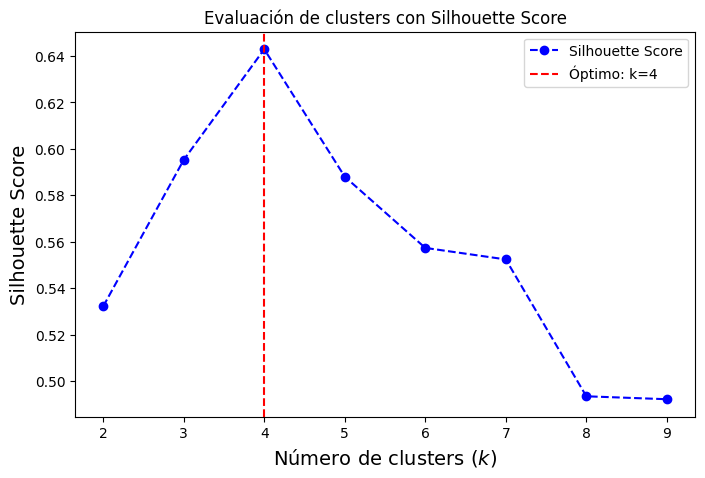

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Evaluar K entre 2 y 10
k_values = range(2, 10)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X) for k in k_values]

# Calcular Silhouette Score para cada modelo
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Determinar el mejor número de clusters
optimal_k = k_values[np.argmax(silhouette_scores)]

# Gráfico del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, "bo-", linestyle="--", label="Silhouette Score")
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Óptimo: k={optimal_k}")
plt.xlabel("Número de clusters ($k$)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Evaluación de clusters con Silhouette Score")
plt.legend()
plt.show()





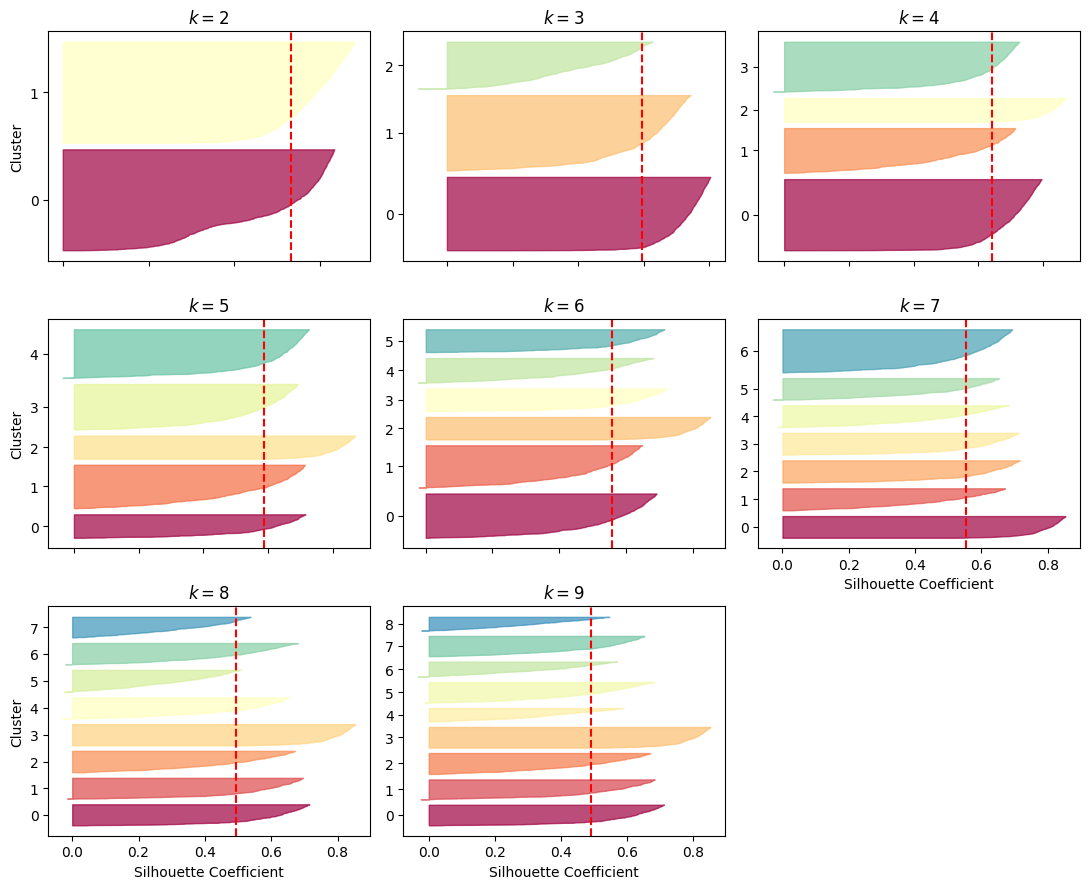

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura con subgráficos
plt.figure(figsize=(11, 9))

# Graficar la distribución de coeficientes de Silhouette para cada k evaluado
for k in k_values:
    plt.subplot(3, 3, k - 1)  # Ajuste dinámico según cantidad de k evaluados

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)  # Asignar colores a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configuración de los ejes
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (2, 5, 8):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")  # Línea roja para el promedio
    plt.title(f"$k={k}$", fontsize=12)

plt.tight_layout()
plt.show()



**Efectividad del modelo KMeans**

Aplicando K-Means usando los valores óptimos de clusters encontrados mediante el Método del Codo y Silhouette Score, mostrando los resultados en dos gráficos comparativos.

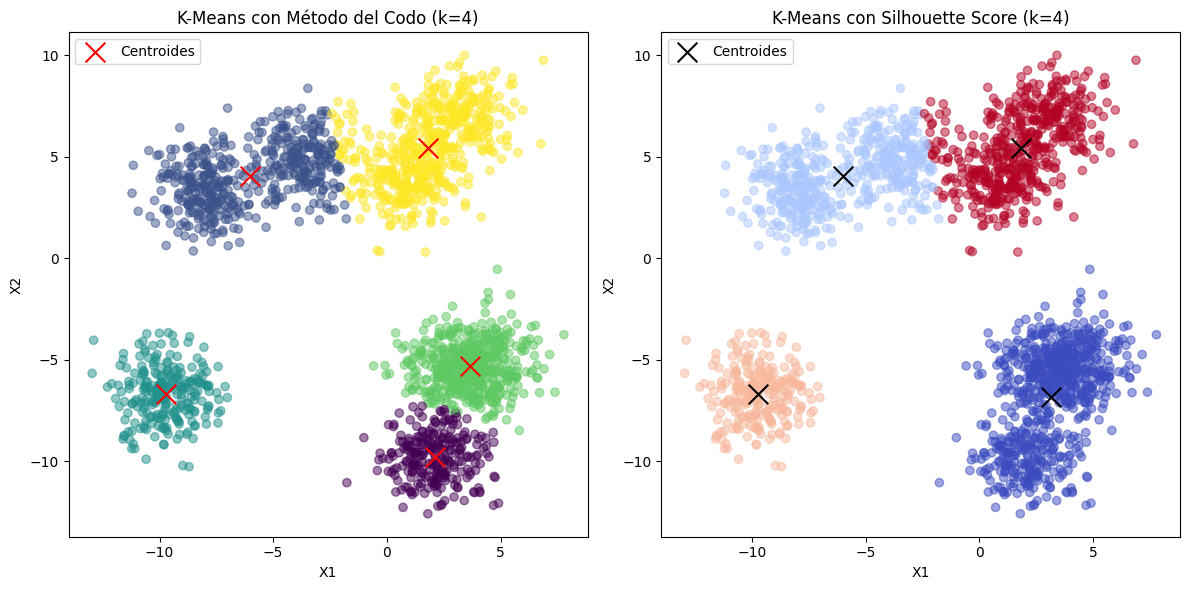

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-Means con los valores obtenidos de cada método
kmeans_codo = KMeans(n_clusters=optimal_k_codo, random_state=42, n_init=10,algorithm="elkan").fit(X)
kmeans_silhouette = KMeans(n_clusters=np.argmax(silhouette_scores) + 2,algorithm="elkan", random_state=42, n_init=10).fit(X)

# Crear las figuras
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico K-Means basado en el método del codo
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_codo.labels_, cmap='viridis', alpha=0.5)
axes[0].scatter(kmeans_codo.cluster_centers_[:, 0], kmeans_codo.cluster_centers_[:, 1],
                c='red', marker='x', s=200, label="Centroides")
axes[0].set_title(f"K-Means con Método del Codo (k={optimal_k_codo})")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[0].legend()

# Gráfico K-Means basado en Silhouette Score
axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_silhouette.labels_, cmap='coolwarm', alpha=0.5)
axes[1].scatter(kmeans_silhouette.cluster_centers_[:, 0], kmeans_silhouette.cluster_centers_[:, 1],
                c='black', marker='x', s=200, label="Centroides")
axes[1].set_title(f"K-Means con Silhouette Score (k={np.argmax(silhouette_scores) + 2})")
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")
axes[1].legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()


# **LAB 05 - PUNTO 2 Aprendizaje semisupervisado**

**1. Carga y preparación de datos**

Este bloque importa las librerías esenciales (pandas, numpy y train_test_split), lee el archivo hour.csv en un DataFrame y separa las features en X (eliminando índices, fechas y conteos) y la variable objetivo y, que es el total de alquileres (cnt).

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# IMportacion'hour.csv'
df = pd.read_csv("hour.csv")

# Definimos X con las características y y con la variable objetivo
X = df.drop(columns=["instant", "dteday", "casual", "registered", "cnt"])
y = df["cnt"]

**2. Binarización de la variable objetivo**



Aquí calculamos la mediana de cnt y creamos y_class, una etiqueta binaria:

0 para registros con conteo ≤ mediana (“bajo uso”)

1 para registros con conteo > mediana (“alto uso”)
Esto transforma el problema original de regresión en un problema de clasificación binaria.



In [71]:
import numpy as np
median_cnt = y.median()
y_class = (y > median_cnt).astype(int)  # 0 = bajo uso, 1 = alto uso


**3. División en entrenamiento y prueba**

Separo los datos en entrenamiento (75 %) y test (25 %) usando semilla fija (random_state=42) para garantizar que los resultados sean reproducibles.



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y_class, random_state=42)

**4. Clustering y selección de representativos**

Creamos un K-Means con 600 clusters sobre X_train.

fit_transform ajusta los centroides y devuelve, para cada muestra, su distancia a cada centroide.

Con np.argmin(..., axis=0) elegimos la muestra más cercana a cada uno de los 600 centroides.

X_repr y y_repr contienen esas 600 observaciones “representativas” y sus etiquetas, listas para el entrenamiento reducido.

In [73]:
from sklearn.cluster import KMeans

k = 600
kmeans = KMeans(n_clusters=k, random_state=42)
X_dist = kmeans.fit_transform(X_train)
idxs = np.argmin(X_dist, axis=0)
X_repr = X_train.iloc[idxs]
y_repr = y_train.iloc[idxs]


**5. Entrenamiento con muestras representativas**

Se entrena una Regresión Logística multiclass-por-defecto (aunque aquí binaria) usando sólo las 600 muestras seleccionadas. La precisión en el conjunto de prueba (score_repr) evalúa cuánto se acerca este modelo “ligero” al etiquetado real.

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg_repr = LogisticRegression(
    solver="lbfgs", max_iter=5000, random_state=42)
log_reg_repr.fit(X_repr, y_repr)
score_repr = log_reg_repr.score(X_test, y_test)
print("Precisión con muestras representativas:", score_repr)


Precisión con muestras representativas: 0.7813578826237054


**6. Entrenamiento con muestras aleatorias**

Para comparar, seleccionamos 50 muestras al azar del conjunto de entrenamiento. Entrenamos el mismo modelo y medimos su precisión (score_rand). Esto muestra la importancia de la elección de ejemplos frente al azar puro.

In [77]:
X_rand = X_train.sample(7000, random_state=42)
y_rand = y_train.loc[X_rand.index]
log_reg_rand = LogisticRegression(
    solver="lbfgs", max_iter=5000, random_state=42)
log_reg_rand.fit(X_rand, y_rand)
score_rand = log_reg_rand.score(X_test, y_test)
print("Precisión con muestras aleatorias:", score_rand)


Precisión con muestras aleatorias: 0.7822784810126582


**7. Propagación de etiquetas y entrenamiento ampliado**

Creamos y_prop, asignando a todas las muestras de cada clúster la etiqueta de su centroide.

Entrenamos la regresión con las primeras 10 000 muestras “etiquetadas automáticamente” y evaluamos la precisión (score_prop).

Este bloque demuestra cómo la propagación masiva puede introducir ruido y afectar el rendimiento.

In [78]:
y_prop = np.empty(len(X_train), dtype=int)
for i in range(k):
    mask = (kmeans.labels_ == i)
    y_prop[mask] = y_repr.iloc[i]
log_reg_prop = LogisticRegression(
    solver="lbfgs", max_iter=10000, random_state=42)
log_reg_prop.fit(X_train.iloc[:10000], y_prop[:10000])
score_prop = log_reg_prop.score(X_test, y_test)
print("Precisión con etiquetas propagadas:", score_prop)


Precisión con etiquetas propagadas: 0.779746835443038


# **LAB 05 - PUNTO 2 Aprendizaje activo**

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

# 1. Carga y preparación
df = pd.read_csv("hour.csv")
X = df.drop(columns=["instant","dteday","casual","registered","cnt"])
y = df["cnt"]
median_cnt = y.median()
y_class = (y > median_cnt).astype(int)

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, random_state=42)

# 3. Auto-etiquetado inicial con K-Means (k=50) y propagación
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_dist = kmeans.fit_transform(X_train.values)
idxs = np.argmin(X_dist, axis=0)
X_repr = X_train.iloc[idxs]
y_repr = y_train.iloc[idxs]

# Etiquetas propagadas a todo el training
y_prop = np.empty(len(X_train), dtype=int)
for i in range(k):
    y_prop[kmeans.labels_ == i] = y_repr.iloc[i]

# Entrenamos un primer modelo con las primeras 1000 muestras propagadas
log_reg3 = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
log_reg3.fit(X_train.iloc[:1000], y_prop[:1000])

# 4. Predict_proba sobre las 1000 iniciales
probas = log_reg3.predict_proba(X_train.iloc[:1000])
labels_ixs = np.argmax(probas, axis=1)
# Confianza en la clase predicha
labels_conf = np.array([p[ix] for p, ix in zip(probas, labels_ixs)])

# 5. Selección de k ejemplos más inseguros
sorted_ixs = np.argsort(labels_conf)
k_active = 10  # por ejemplo, corregimos las 10 más inseguras
active_idxs = sorted_ixs[:k_active]

# 6. Recuperar sus etiquetas verdaderas y corregir
y_true = y_train.values[:1000]
y_lowest = y_true[active_idxs]

y_train2 = y_prop[:1000].copy()
y_train2[active_idxs] = y_lowest

# 7. Reentrenar con etiquetas activamente corregidas
log_reg5 = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
log_reg5.fit(X_train.iloc[:1000], y_train2)

# 8. Evaluar
score_active = log_reg5.score(X_test, y_test)
print("Precisión tras Active Learning:", score_active)


Precisión tras Active Learning: 0.7452243958573073


# **Laboratorio 5 - Punto 3**

**Bloque 1: Carga y preprocesamiento**

Lee el CSV y convierte Formatted Date a datetime (para posible uso futuro).

Separa numéricas y categóricas.

Escala las numéricas (media 0, desviación 1) y aplica one-hot a las categóricas.

Devuelve un array listo para clustering.

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carga de datos
df = pd.read_csv("weatherHistory.csv", parse_dates=["Formatted Date"])

# Selección de columnas relevantes
# Variables numéricas y categóricas
num_cols = ["Temperature (C)", "Apparent Temperature (C)", "Humidity",
            "Wind Speed (km/h)", "Wind Bearing (degrees)",
            "Visibility (km)", "Loud Cover", "Pressure (millibars)"]
cat_cols = ["Summary", "Precip Type"]

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_cols),
])

X = preprocessor.fit_transform(df[num_cols + cat_cols])


**Bloque 2: Reducción a 2D para visualización (PCA)**

Reduce los ~n dimensiones a 2 componentes principales para poder graficar los clusters en el plano.

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


**Bloque 3: DBSCAN y etiquetas de cluster**

Ajusta DBSCAN con eps=0.3, min_samples=10 sobre las 2D de PCA.

labels_db marca cada punto: ≥0 para clúster, -1 para ruido.

Imprime los IDs de cluster encontrados.

In [84]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_db = dbscan.fit_predict(X_pca)
unique_labels = np.unique(labels_db)
print("Clusters (incluyendo ruido -1):", unique_labels)


Clusters (incluyendo ruido -1): [-1  0]


**Bloque 4: Visualización de resultados DBSCAN**

Dibuja cada muestra en el espacio PCA, coloreando según su etiqueta de DBSCAN (ruido en gris oscuro).

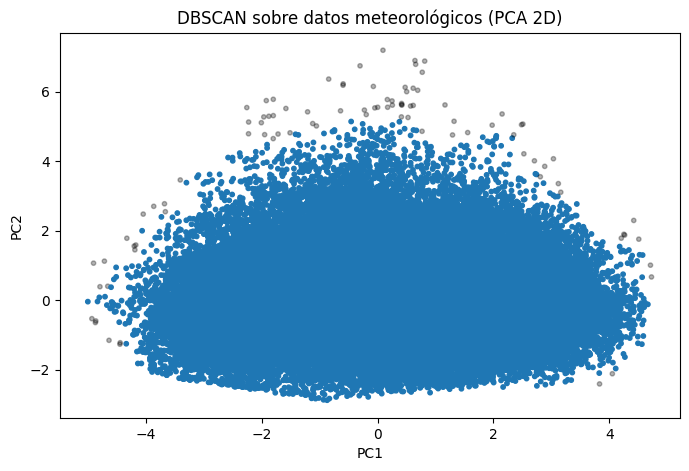

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# Diccionario de colores automático, ruido en negro
colors = [plt.cm.tab10(l % 10) if l >= 0 else (0,0,0,0.3) for l in labels_db]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, s=10)
plt.title("DBSCAN sobre datos meteorológicos (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


**Bloque 5: KNN sobre core samples de DBSCAN**

Entrena un KNN usando solo los core samples de DBSCAN, para luego poder clasificar nuevos puntos.

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Extraer core samples y sus labels
core_idxs = dbscan.core_sample_indices_
X_core = X_pca[core_idxs]
y_core = labels_db[core_idxs]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_core, y_core)


KNeighborsClassifier(n_neighbors=20)

**Bloque 6: Gaussian Mixture Model (GMM)**

Ajusta un GMM con 4 componentes a los datos en PCA.

Recupera etiquetas, pesos y parámetros de cada Gaussiana.

In [87]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, n_init=5, random_state=42)
gm.fit(X_pca)

labels_gm = gm.predict(X_pca)
weights, means, covs = gm.weights_, gm.means_, gm.covariances_
print("Pesos:", np.round(weights,2))
print("Medias:", means)


Pesos: [0.28 0.23 0.18 0.32]
Medias: [[-1.87151932 -0.2423013 ]
 [ 2.10376685 -0.09748656]
 [-0.2669938   1.2166405 ]
 [ 0.2661704  -0.4034643 ]]


**Bloque 7: Visualización de GMM (densidad y fronteras)**

Dibuja niveles de densidad (colormapa logarítmico) y fronteras de cluster (líneas rojas)

Superpone los puntos coloreados por su etiqueta GMM.

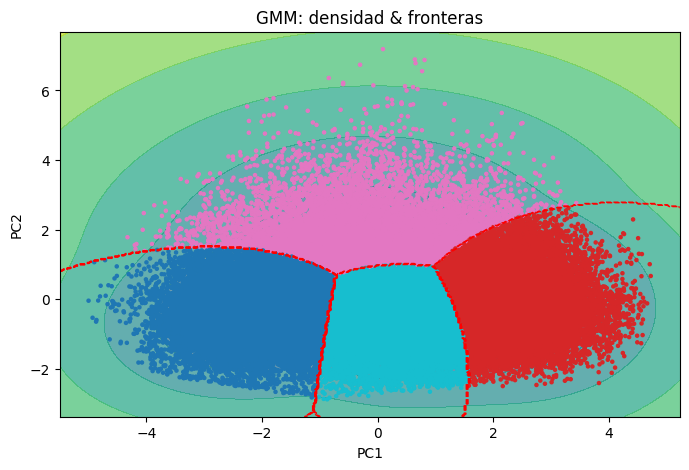

In [88]:
import numpy as np
from matplotlib.colors import LogNorm

def plot_gmm(clusterer, X2d):
    mins = X2d.min(axis=0) - 0.5
    maxs = X2d.max(axis=0) + 0.5
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 300),
                         np.linspace(mins[1], maxs[1], 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = -clusterer.score_samples(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1, vmax=50),
                 levels=np.logspace(0,2,12), alpha=0.7)
    lbl = clusterer.predict(grid).reshape(xx.shape)
    plt.contour(xx, yy, lbl, colors='r', linewidths=1, linestyles='--')
    plt.scatter(X2d[:,0], X2d[:,1], c=labels_gm, s=5, cmap="tab10")
    plt.title("GMM: densidad & fronteras")
    plt.xlabel("PC1"); plt.ylabel("PC2")

plt.figure(figsize=(8,5))
plot_gmm(gm, X_pca)
plt.show()


**Bloque 8: Detección de anomalías con GMM**

Calcula densidad log-prob (score_samples).

Define anomalías como el 5 % con menor densidad.

Las dibuja sobre la trama de GMM.

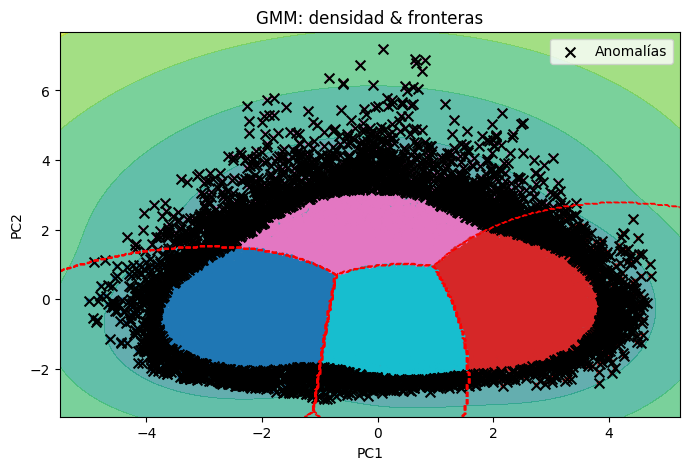

In [89]:
dens = gm.score_samples(X_pca)
umbral = np.percentile(dens, 5)
anomalies = X_pca[dens < umbral]

plt.figure(figsize=(8,5))
plot_gmm(gm, X_pca)
plt.scatter(anomalies[:,0], anomalies[:,1], c='k', marker='x', s=50, label='Anomalías')
plt.legend()
plt.show()
